In [ ]:
#Import Library

import os
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define directories
train_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Train'
validation_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Val'
test_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Test'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the Strawberry dataset
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

test_generator = datagen.flow_from_directory(
    test_dir ,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 3663 images belonging to 2 classes.
Found 819 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


In [1]:
from tensorflow.keras.applications import ResNet50V2

#  Load ResNet50V2 model for feature extraction
resnet50v2_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 3. Extract features
def extract_features(generator, model):
    features = model.predict(generator)
    features_flat = features.reshape(features.shape[0], -1)
    return features_flat

train_features = extract_features(train_generator, resnet50v2_model)
validation_features = extract_features(validation_generator, resnet50v2_model)
test_features = extract_features(test_generator, resnet50v2_model)

# Get labels
train_labels = train_generator.classes
validation_labels = validation_generator.classes
test_labels = test_generator.classes


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


NameError: name 'train_generator' is not defined

In [ ]:
# Print the model summary
resnet50v2_model.summary()

# To get the total number of parameters
total_params = resnet50v2_model.count_params()
print(f"Total number of parameters in ResNet50: {total_params}")

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

Total number of parameters in ResNet50: 23564800


**Support Vector Machine**

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       409

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Confusion Matrix (Test):
[[46  0]
 [ 0 45]]


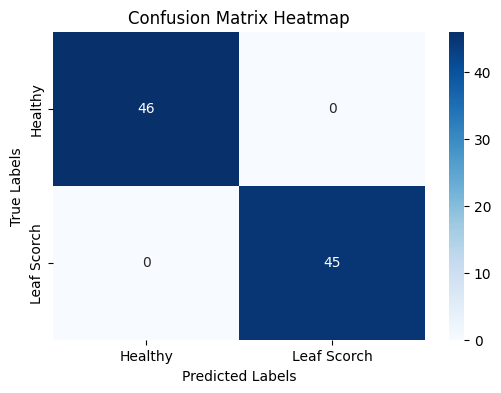

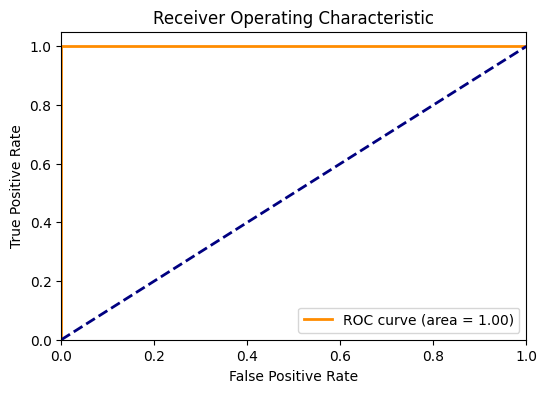

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train a classification algorithm
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(train_features, train_labels)


#  Evaluate the model
validation_predictions = svm_classifier.predict(validation_features)
test_predictions = svm_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels,test_predictions))

# Confusion Matrix
cm=confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix (Test):")
print(cm)


# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, svm_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       410
           1       0.97      0.95      0.96       409

    accuracy                           0.96       819
   macro avg       0.96      0.96      0.96       819
weighted avg       0.96      0.96      0.96       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Confusion Matrix (Test):
[[46  0]
 [ 0 45]]


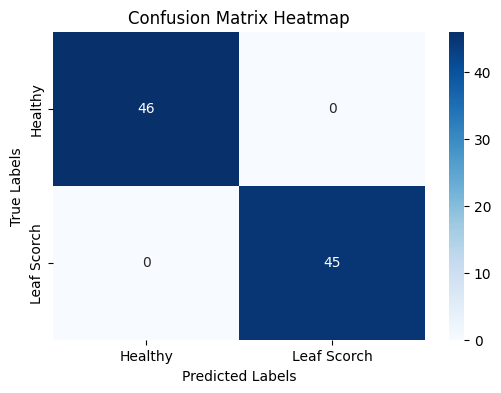

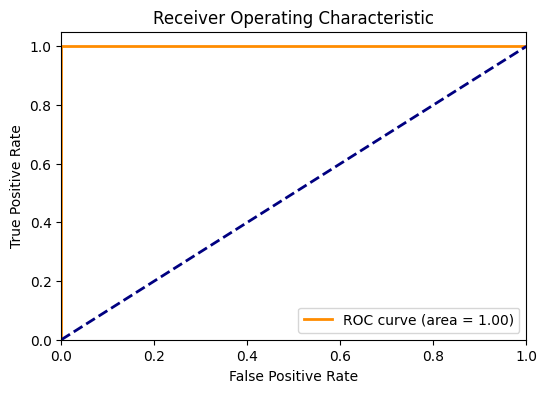

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_features, train_labels)

# Evaluate the model
validation_predictions = dt_classifier.predict(validation_features)
test_predictions = dt_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
cm=confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix (Test):")
print(cm)


# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, dt_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       409

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Confusion Matrix (Test):
[[46  0]
 [ 0 45]]


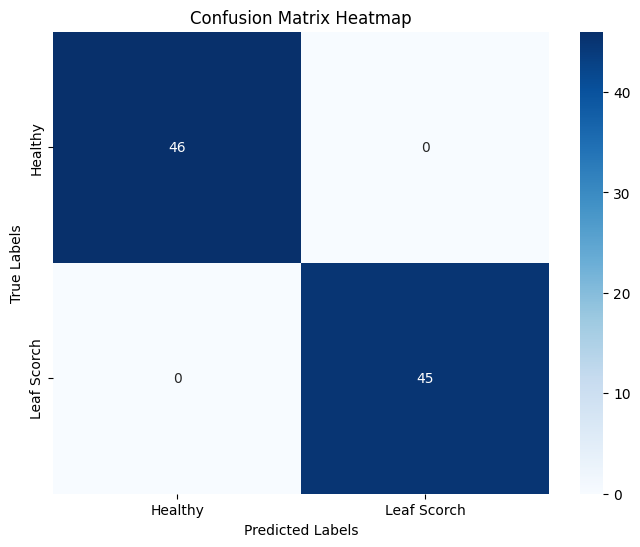

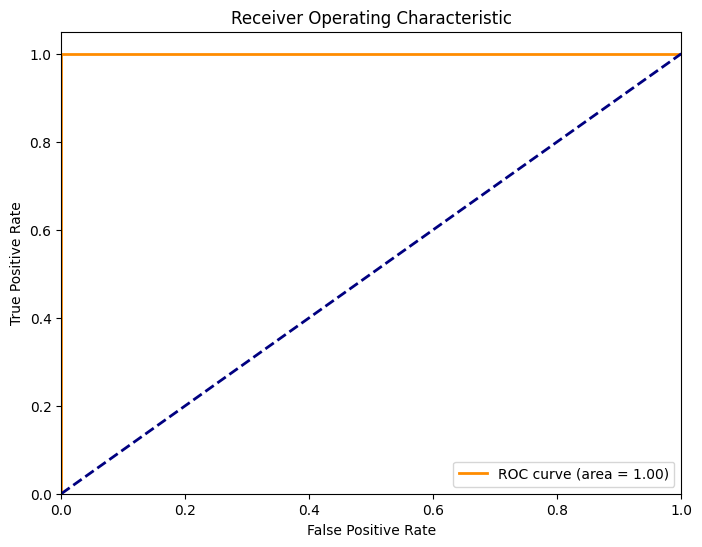

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, auc
import numpy as np

#  Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

#  Evaluate the model
validation_predictions = rf_classifier.predict(validation_features)
test_predictions = rf_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
cm=confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix (Test):")
print(cm)


# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, rf_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()